# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar

In [2]:
# Create dataframes for cases_train.csv and location.csv
df_ct = pd.read_csv('../data/cases_train.csv') 
df_l = pd.read_csv('../data/location.csv')

## Bar Chart

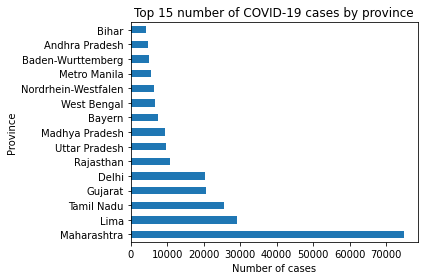

In [3]:
# top 15 number of COVID-19 cases by province
top_15_provinces = df_ct['province'].value_counts().head(15)
top_15_provinces.plot(
    title = 'Top 15 number of COVID-19 cases by province',
    kind = 'barh'
)

plt.xlabel('Number of cases')
plt.ylabel('Province')
plt.tight_layout()
# call savefig before show otherwise it will be a corrupt image
plt.savefig('../plots/cases_by_province.pdf')
plt.show()

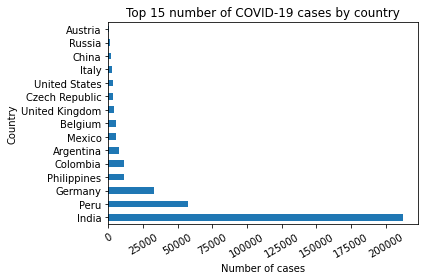

In [4]:
# top 15 number of COVID-19 cases by country
top_15_countries = df_ct['country'].value_counts().head(15)
top_15_countries.plot(
    title = 'Top 15 number of COVID-19 cases by country',
    kind = 'barh'
)

plt.xlabel('Number of cases')
plt.xticks(rotation = 30)
plt.ylabel('Country')
plt.tight_layout()
# call savefig before show otherwise it will be a corrupt image
plt.savefig('../plots/cases_by_country.pdf')
plt.show()

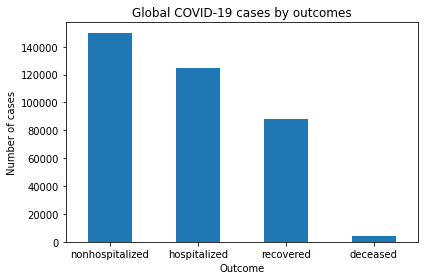

In [5]:
# Global COVID-19 cases by outcomes
outcomes = df_ct['outcome'].value_counts()
outcomes.plot(
    title = 'Global COVID-19 cases by outcomes',
    kind = 'bar'
)

plt.xlabel('Outcome')
plt.xticks(rotation = 0)
plt.ylabel('Number of cases')
plt.tight_layout()
# call savefig before show otherwise it will be a corrupt image
plt.savefig('../plots/cases_by_outcomes.pdf')
plt.show()

1       817
2      1338
3     26339
4     76565
5    243973
6     18230
Name: date_confirmation, dtype: int64


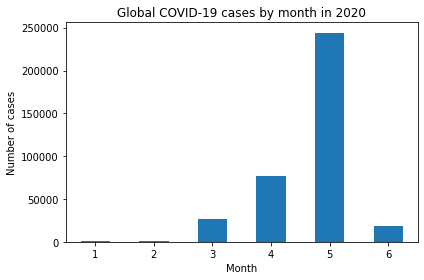

In [6]:
# Global COVID-19 cases by month confirmed in 2020
# removed the few dates that had ranges
date_confirmations = df_ct.date_confirmation[~df_ct['date_confirmation'].str.contains("-", na = False)]
date_confirmations = pd.to_datetime(date_confirmations, dayfirst = True)

month_confirmations = date_confirmations.dt.month.value_counts().sort_index()
month_confirmations.index = month_confirmations.index.astype(int)

month_confirmations.plot(
    title = 'Global COVID-19 cases by month in 2020',
    kind = 'bar'
)

plt.xlabel('Month')
plt.xticks(rotation = 0)
plt.ylabel('Number of cases')
plt.tight_layout()
# call savefig before show otherwise it will be a corrupt image
plt.savefig('../plots/cases_by_month.pdf')
plt.show()
